In [2]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
!pip install Pillow

In [3]:
import PIL
print(PIL.PILLOW_VERSION)

5.4.1


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!ls

gdrive	sample_data


In [5]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
import helper

--2019-01-10 11:07:05--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import torch.utils.data
import json
import numpy as np

In [0]:
data_dir = 'gdrive/My Drive/DL/Flower Classification/flower_data'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'

In [0]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])
                                                             
valid_transforms = transforms.Compose([transforms.Resize(255),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])])
                                      
#pass transforms in here, then run the next cell to see how the transforme looks
train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_transforms)                                 

                                      
# TODO: Load the datasets with ImageFolder
#image_datasets = datasets.ImageFolder(data_dir, transform=transform)

# TODO: Using the image datasets and the trainforms (transform), define the dataloaders
#ORIGINAL CODE- dataloaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=32)

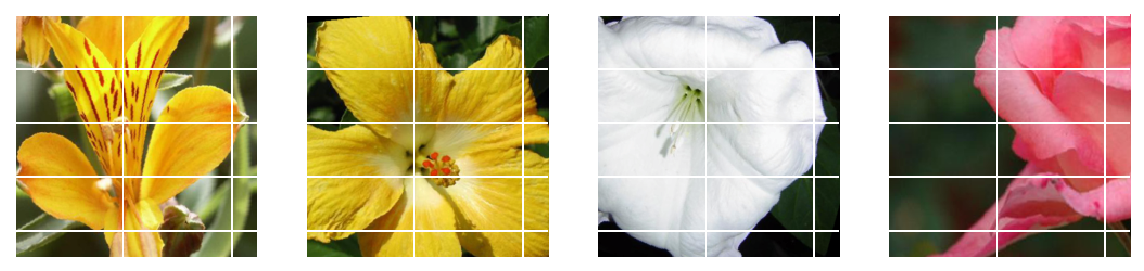

In [10]:
#Transform Images lookslike for Trainloader and validloader
'''images, labels = next(iter(validloader))
helper.imshow(images[0], normalize=True) '''



data_iter = iter(trainloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=True)

In [0]:
with open('gdrive/My Drive/DL/Flower Classification/cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)
    cat_to_name = json.load(open('gdrive/My Drive/DL/Flower Classification/cat_to_name.json'))

In [0]:
model = models.resnet152(pretrained=True)
#print model architecuture
#print(model)

In [0]:
from torch.optim.lr_scheduler import MultiStepLR

In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# TODO: Build and train your network
model = models.resnet152(pretrained=True)


# Freeze parameters so we don't backprop through them
#turn off gradeint for our models.
for param in model.parameters():
    param.requires_grad = False
    
model.fc = nn.Sequential(nn.Linear(2048, 512),
                         nn.ReLU(),
                         nn.Linear(512, 102),
                         nn.LogSoftmax(dim=1))

#negative loss
criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
#optimizer = optim.Adam(model.fc.parameters(), lr=0.003) and either use SGD
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
#scheduler = MultiStepLR(optimizer, milestone[12, 22, 30], gamma=0.1)
schedular = optim.lr_scheduler.MultiStepLR(optimizer, milestones = [12, 22, 30], gamma=0.1)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [0]:
epochs = 5
steps = 0
running_loss = 0
print_every = 5

for epoch in range(epochs):
    for images, labels in trainloader:
        steps += 1
        
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            model.eval()
            test_loss = 0
            accuracy = 0
            
            for images, labels in validloader:
                images, labels = images.to(device), labels.to(device)
                logps = model(images)
                loss = criterion(logps, labels)
                test_loss += loss.item()
                
                #calculate the accuracy
                ps = torch.exp(logps)
                top_ps, top_class = ps.topk(1, dim=1)
                equality = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equality.type(torch.FloatTensor)).item()
                
                
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(validloader):.3f}.. "
                  f"Test accuracy: {accuracy/len(validloader):.3f}")
            running_loss = 0
            model.train()

Epoch 1/5.. Train loss: 4.776.. Test loss: 4.690.. Test accuracy: 0.026
Epoch 1/5.. Train loss: 4.598.. Test loss: 4.519.. Test accuracy: 0.064
Epoch 1/5.. Train loss: 4.504.. Test loss: 4.429.. Test accuracy: 0.064
Epoch 1/5.. Train loss: 4.472.. Test loss: 4.318.. Test accuracy: 0.135
Epoch 1/5.. Train loss: 4.267.. Test loss: 4.190.. Test accuracy: 0.145
Epoch 1/5.. Train loss: 4.235.. Test loss: 4.118.. Test accuracy: 0.153
Epoch 1/5.. Train loss: 4.027.. Test loss: 4.053.. Test accuracy: 0.114
Epoch 1/5.. Train loss: 4.092.. Test loss: 3.880.. Test accuracy: 0.184
Epoch 1/5.. Train loss: 4.047.. Test loss: 3.792.. Test accuracy: 0.198
Epoch 1/5.. Train loss: 3.802.. Test loss: 3.697.. Test accuracy: 0.198
Epoch 1/5.. Train loss: 3.910.. Test loss: 3.530.. Test accuracy: 0.227
Epoch 1/5.. Train loss: 3.732.. Test loss: 3.382.. Test accuracy: 0.302
Epoch 1/5.. Train loss: 3.554.. Test loss: 3.271.. Test accuracy: 0.323
Epoch 1/5.. Train loss: 3.296.. Test loss: 3.124.. Test accuracy

In [0]:
model.class_to_idx = train_data.class_to_idx
model.cpu()
torch.save({'arch': 'resnet152',
            'state_dict': model.state_dict(), 
            'class_to_idx': model.class_to_idx}, 
            'checkpoint.pth')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
torch.save(model.state_dict(), 'gdrive/My Drive/DL/Flower Classification/checkpoint.pth')